In [ ]:
%pip install statsmodels
%pip install scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
filename = "EDA_on_Tesla_Stock_Data.csv" 
data = pd.read_csv(filename)

In [3]:
print(data)

      Serial Number     Date        Open        High         Low       Close  \
0                 0  6/29/10    1.266667    1.666667    1.169333    1.592667   
1                 1  6/30/10    1.719333    2.028000    1.553333    1.588667   
2                 2   7/1/10    1.666667    1.728000    1.351333    1.464000   
3                 3   7/2/10    1.533333    1.540000    1.247333    1.280000   
4                 4   7/6/10    1.333333    1.333333    1.055333    1.074000   
...             ...      ...         ...         ...         ...         ...   
3632           3632  12/3/24  351.799988  355.690002  348.200012  351.420013   
3633           3633  12/4/24  353.000000  358.100006  348.600006  357.929993   
3634           3634  12/5/24  359.869995  375.429993  359.500000  369.489990   
3635           3635  12/6/24  377.420013  389.489990  370.799988  389.220001   
3636           3636  12/9/24  397.609985  404.799988  378.010010  389.790008   

       Adj Close     Volume  
0       1

In [4]:
data.head(10)

,Serial Number,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
5,5,7/7/10,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
6,6,7/8/10,1.076000,1.168000,1.038000,1.164000,1.164000,115671000
7,7,7/9/10,1.172000,1.193333,1.103333,1.160000,1.160000,60759000
8,8,7/12/10,1.196667,1.204667,1.133333,1.136667,1.136667,33037500
9,9,7/13/10,1.159333,1.242667,1.126667,1.209333,1.209333,40201500


In [5]:
data.tail(10)

,Serial Number,Date,Open,High,Low,Close,Adj Close,Volume
3627,3627,11/25/24,360.140015,361.929993,338.200012,338.589996,338.589996,95890900
3628,3628,11/26/24,341.000000,346.959992,335.660004,338.230011,338.230011,62295900
3629,3629,11/27/24,341.799988,342.549988,326.589996,332.890015,332.890015,57896400
3630,3630,11/29/24,336.079987,345.450012,334.649994,345.160004,345.160004,37167600
3631,3631,12/2/24,352.380005,360.000000,351.149994,357.089996,357.089996,77986500
3632,3632,12/3/24,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,12/4/24,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,12/5/24,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,12/6/24,377.420013,389.489990,370.799988,389.220001,389.220001,81455800
3636,3636,12/9/24,397.609985,404.799988,378.010010,389.790008,389.790008,96359200


In [6]:
# Display the first few rows
data.head()

,Serial Number,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
# Display dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  3637 non-null   int64  
 1   Date           3637 non-null   object 
 2   Open           3637 non-null   float64
 3   High           3637 non-null   float64
 4   Low            3637 non-null   float64
 5   Close          3637 non-null   float64
 6   Adj Close      3637 non-null   float64
 7   Volume         3637 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 227.4+ KB
None


Missing values:
 Serial Number    0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64
       Serial Number         Open         High          Low        Close  \
count    3637.000000  3637.000000  3637.000000  3637.000000  3637.000000   
mean     1818.000000    80.080574    81.832710    78.219276    80.067952   
std      1050.055792   105.466131   107.807170   102.931208   105.409448   
min         0.000000     1.076000     1.108667     0.998667     1.053333   
25%       909.000000    12.046667    12.320000    11.746667    12.065333   
50%      1818.000000    17.833332    18.080000    17.563999    17.846666   
75%      2727.000000   176.070007   179.770004   173.169998   176.880005   
max      3636.000000   411.470001   414.496674   405.666656   409.970001   

         Adj Close        Volume  
count  3637.000000  3.637000e+03  
mean     80.067952  9.667330e+07  
std     105.409448  7.787314

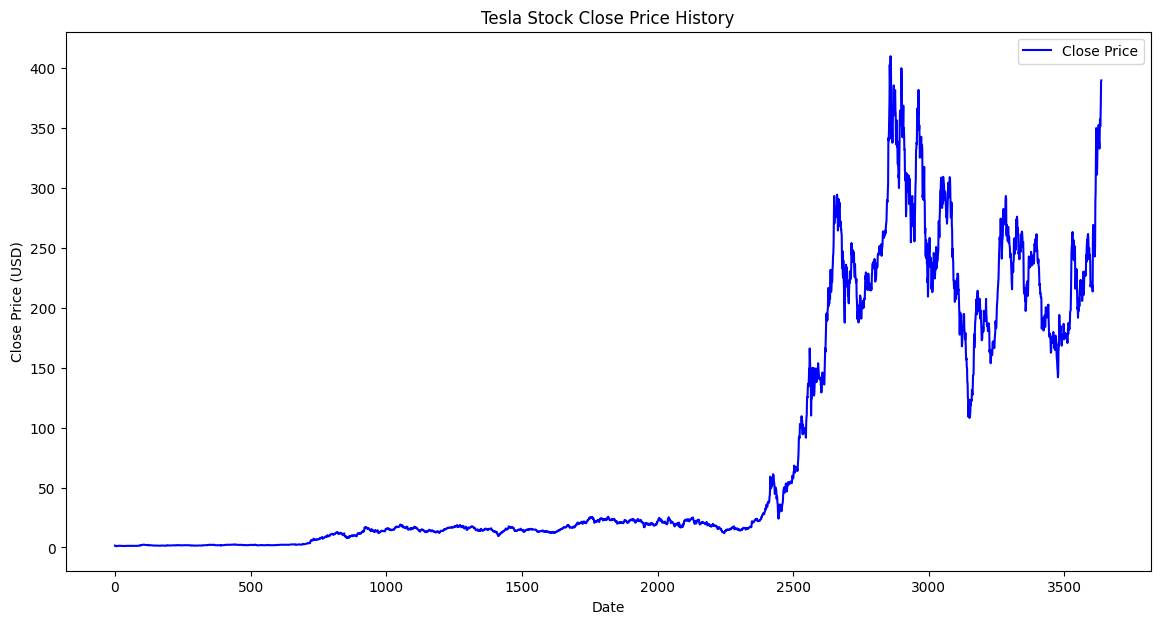

In [8]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Statistical summary
print(data.describe())

# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Tesla Stock Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

Missing values:
 Serial Number    0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64
       Serial Number         Open         High          Low        Close  \
count    3637.000000  3637.000000  3637.000000  3637.000000  3637.000000   
mean     1818.000000    80.080574    81.832710    78.219276    80.067952   
std      1050.055792   105.466131   107.807170   102.931208   105.409448   
min         0.000000     1.076000     1.108667     0.998667     1.053333   
25%       909.000000    12.046667    12.320000    11.746667    12.065333   
50%      1818.000000    17.833332    18.080000    17.563999    17.846666   
75%      2727.000000   176.070007   179.770004   173.169998   176.880005   
max      3636.000000   411.470001   414.496674   405.666656   409.970001   

         Adj Close        Volume  
count  3637.000000  3.637000e+03  
mean     80.067952  9.667330e+07  
std     105.409448  7.787314

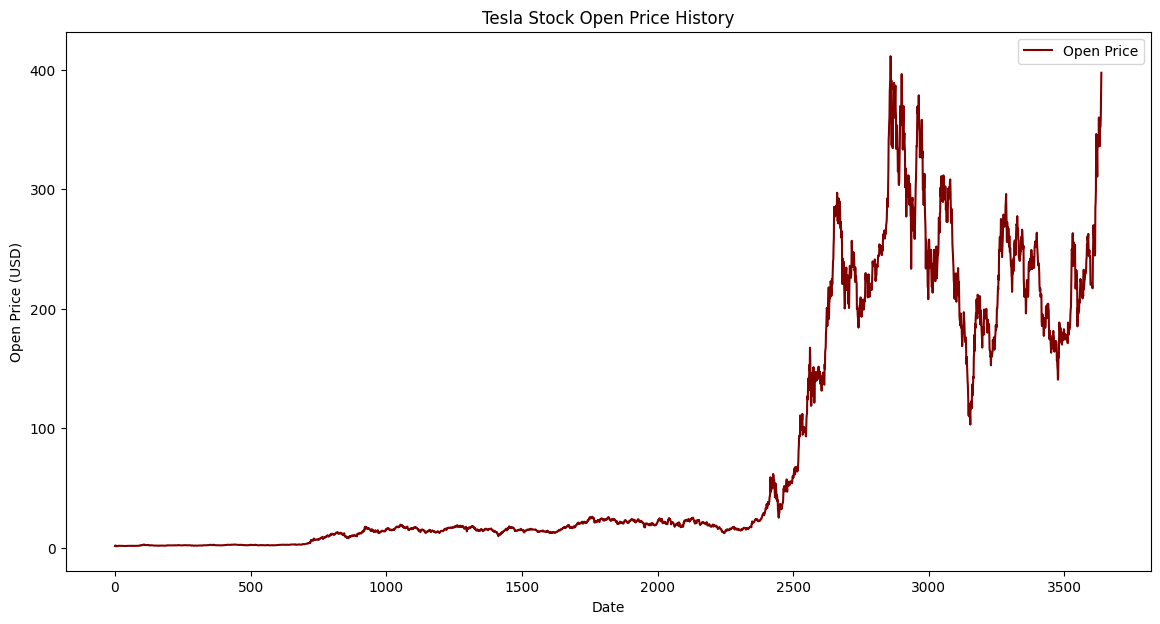

In [13]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Statistical summary
print(data.describe())

# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(data['Open'], label='Open Price', color='maroon')
plt.title('Tesla Stock Open Price History')
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.legend()
plt.show()

Missing values:
 Serial Number    0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64
       Serial Number         Open         High          Low        Close  \
count    3637.000000  3637.000000  3637.000000  3637.000000  3637.000000   
mean     1818.000000    80.080574    81.832710    78.219276    80.067952   
std      1050.055792   105.466131   107.807170   102.931208   105.409448   
min         0.000000     1.076000     1.108667     0.998667     1.053333   
25%       909.000000    12.046667    12.320000    11.746667    12.065333   
50%      1818.000000    17.833332    18.080000    17.563999    17.846666   
75%      2727.000000   176.070007   179.770004   173.169998   176.880005   
max      3636.000000   411.470001   414.496674   405.666656   409.970001   

         Adj Close        Volume  
count  3637.000000  3.637000e+03  
mean     80.067952  9.667330e+07  
std     105.409448  7.787314

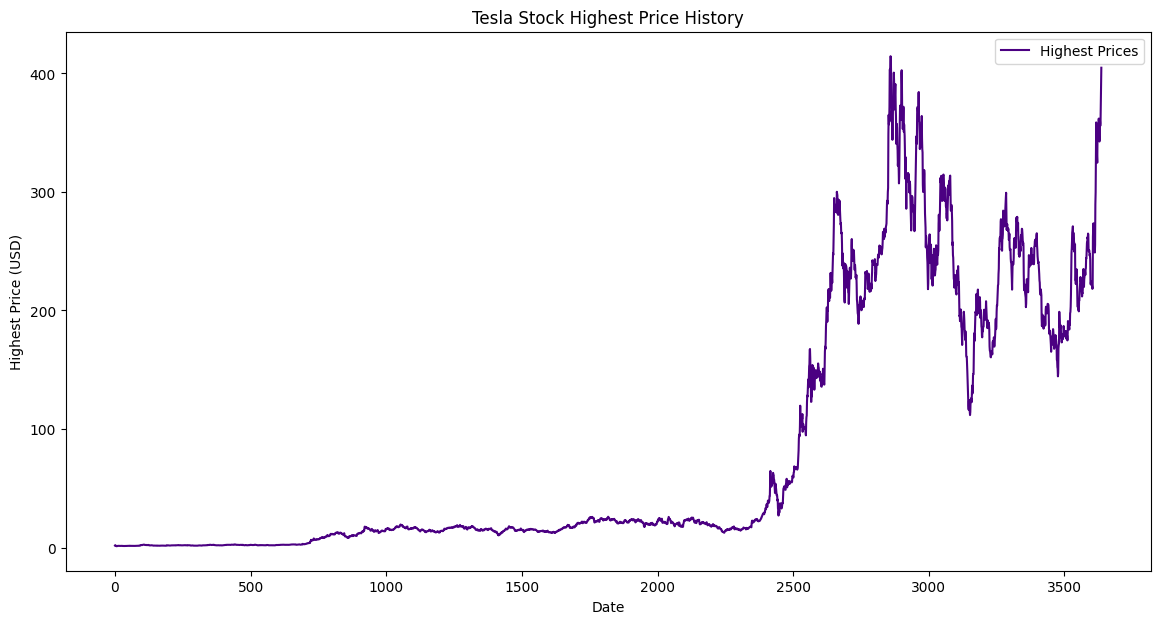

In [14]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Statistical summary
print(data.describe())

# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(data['High'], label='Highest Prices', color='indigo')
plt.title('Tesla Stock Highest Price History')
plt.xlabel('Date')
plt.ylabel('Highest Price (USD)')
plt.legend()
plt.show()

Missing values:
 Serial Number    0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64
       Serial Number         Open         High          Low        Close  \
count    3637.000000  3637.000000  3637.000000  3637.000000  3637.000000   
mean     1818.000000    80.080574    81.832710    78.219276    80.067952   
std      1050.055792   105.466131   107.807170   102.931208   105.409448   
min         0.000000     1.076000     1.108667     0.998667     1.053333   
25%       909.000000    12.046667    12.320000    11.746667    12.065333   
50%      1818.000000    17.833332    18.080000    17.563999    17.846666   
75%      2727.000000   176.070007   179.770004   173.169998   176.880005   
max      3636.000000   411.470001   414.496674   405.666656   409.970001   

         Adj Close        Volume  
count  3637.000000  3.637000e+03  
mean     80.067952  9.667330e+07  
std     105.409448  7.787314

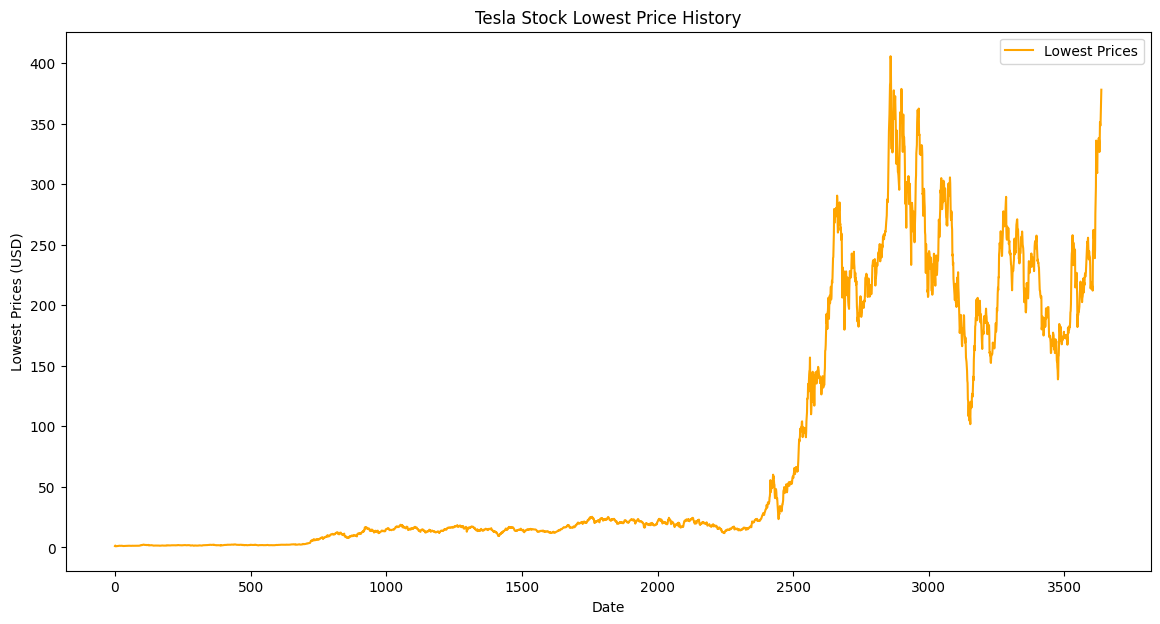

In [15]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Statistical summary
print(data.describe())

# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(data['Low'], label='Lowest Prices', color='orange')
plt.title('Tesla Stock Lowest Price History')
plt.xlabel('Date')
plt.ylabel('Lowest Prices (USD)')
plt.legend()
plt.show()

Missing values:
 Serial Number    0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64
       Serial Number         Open         High          Low        Close  \
count    3637.000000  3637.000000  3637.000000  3637.000000  3637.000000   
mean     1818.000000    80.080574    81.832710    78.219276    80.067952   
std      1050.055792   105.466131   107.807170   102.931208   105.409448   
min         0.000000     1.076000     1.108667     0.998667     1.053333   
25%       909.000000    12.046667    12.320000    11.746667    12.065333   
50%      1818.000000    17.833332    18.080000    17.563999    17.846666   
75%      2727.000000   176.070007   179.770004   173.169998   176.880005   
max      3636.000000   411.470001   414.496674   405.666656   409.970001   

         Adj Close        Volume  
count  3637.000000  3.637000e+03  
mean     80.067952  9.667330e+07  
std     105.409448  7.787314

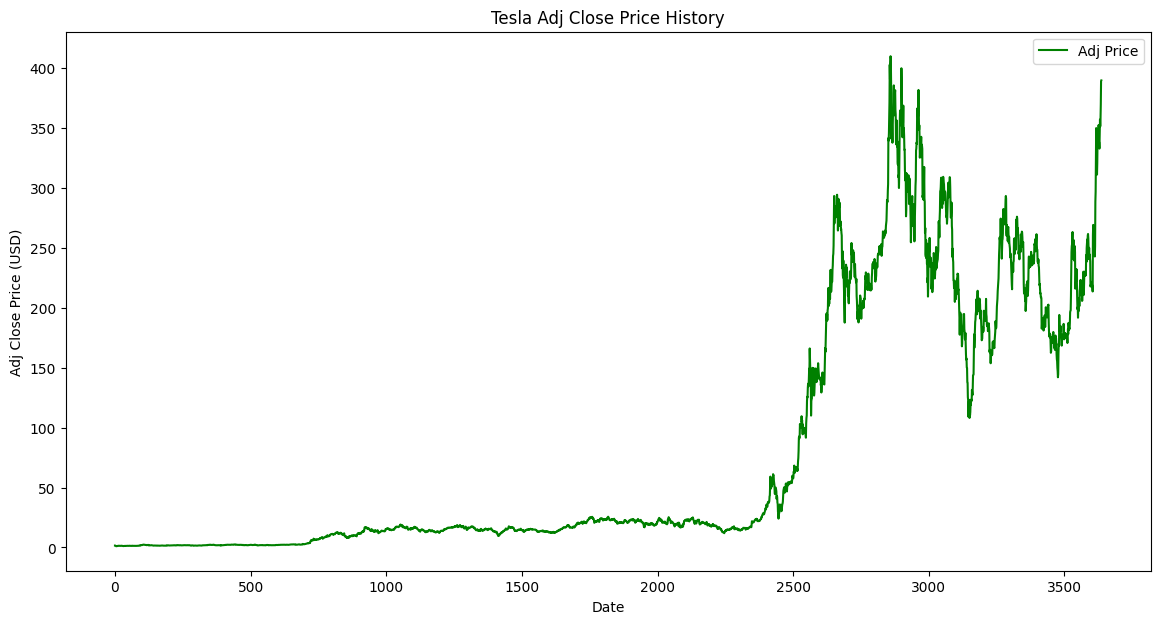

In [16]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Statistical summary
print(data.describe())

# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Price', color='green')
plt.title('Tesla Adj Close Price History')
plt.xlabel('Date')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()

Missing values:
 Serial Number    0
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64
       Serial Number         Open         High          Low        Close  \
count    3637.000000  3637.000000  3637.000000  3637.000000  3637.000000   
mean     1818.000000    80.080574    81.832710    78.219276    80.067952   
std      1050.055792   105.466131   107.807170   102.931208   105.409448   
min         0.000000     1.076000     1.108667     0.998667     1.053333   
25%       909.000000    12.046667    12.320000    11.746667    12.065333   
50%      1818.000000    17.833332    18.080000    17.563999    17.846666   
75%      2727.000000   176.070007   179.770004   173.169998   176.880005   
max      3636.000000   411.470001   414.496674   405.666656   409.970001   

         Adj Close        Volume  
count  3637.000000  3.637000e+03  
mean     80.067952  9.667330e+07  
std     105.409448  7.787314

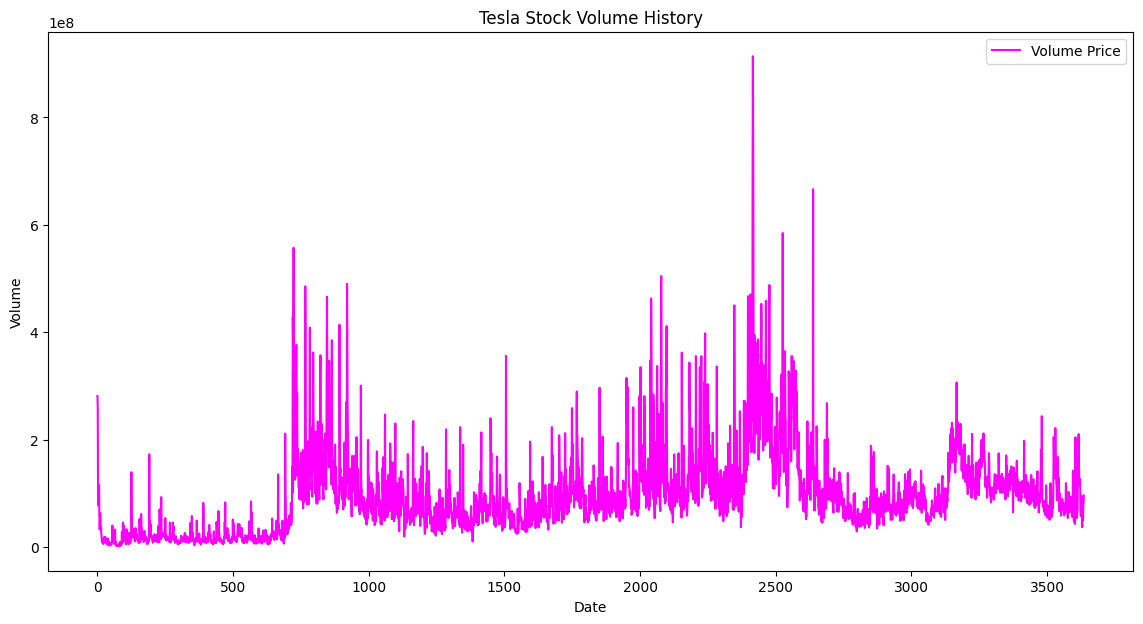

In [17]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Statistical summary
print(data.describe())

# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Volume Price', color='magenta')
plt.title('Tesla Stock Volume History')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

Holt-Winters RMSE: 175.02407438785428


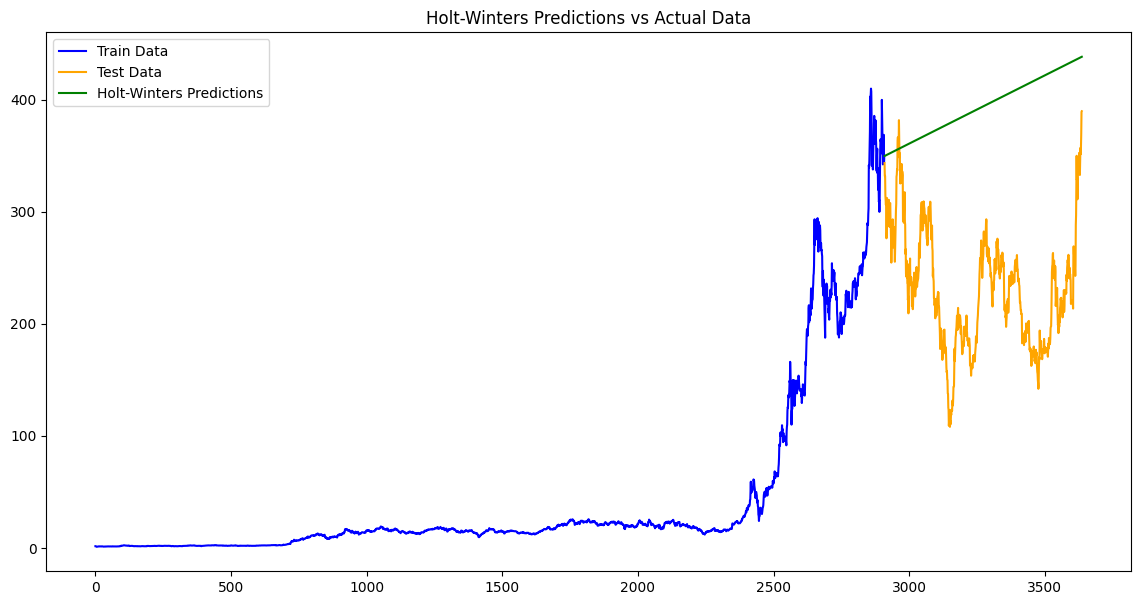

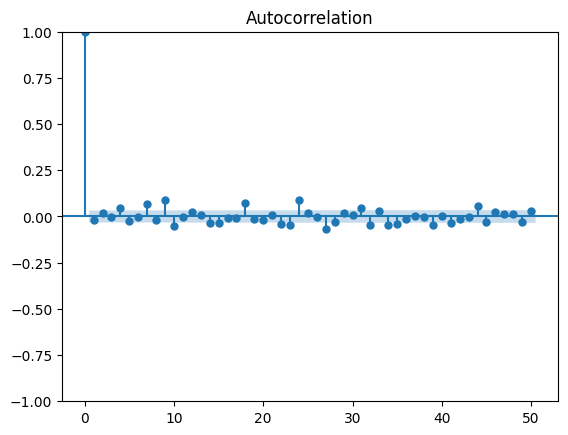

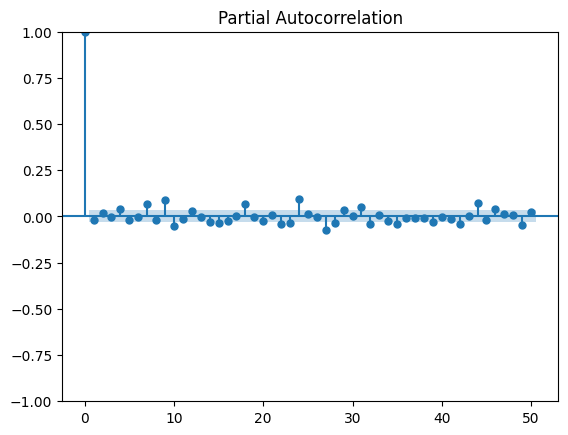

ARIMA RMSE: 129.70177309970796


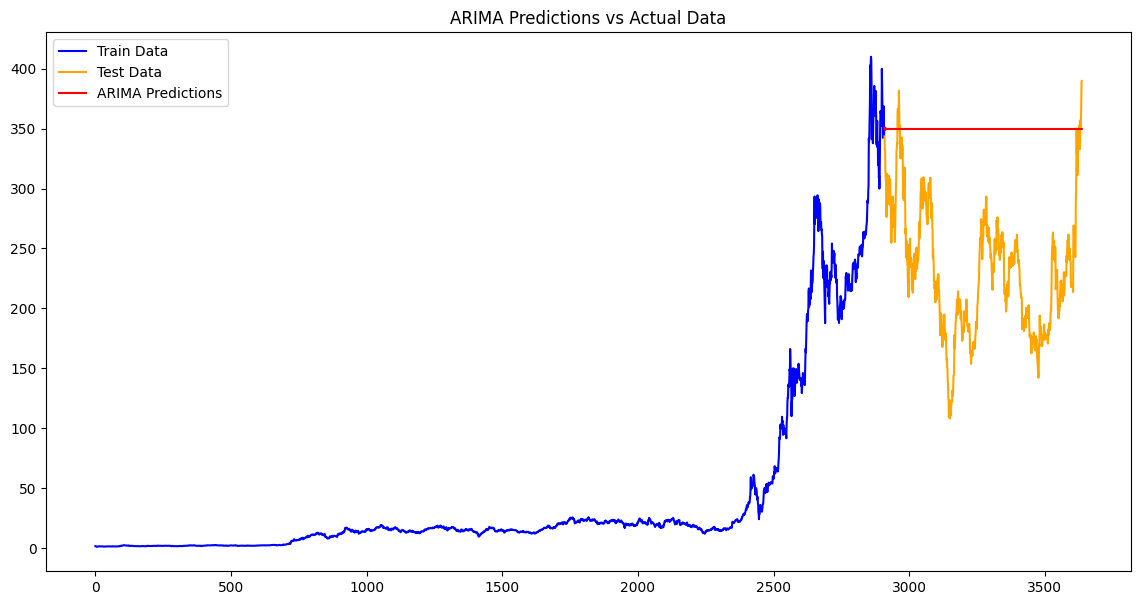

Model Performance:
Holt-Winters RMSE: 175.02407438785428
ARIMA RMSE: 129.70177309970796


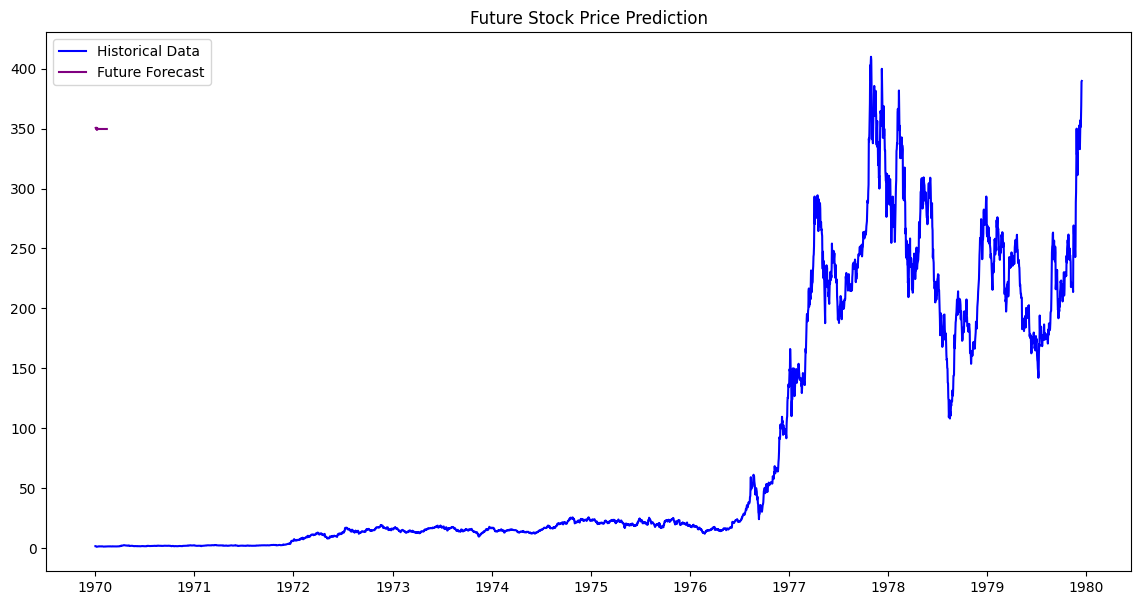

In [12]:
# Train-Test Split for Time Series Prediction
train_data, test_data = train_test_split(data['Close'], test_size=0.2, shuffle=False)

# Holt-Winters Model
model_hw = ExponentialSmoothing(train_data, trend='add', seasonal=None, seasonal_periods=None).fit()
hw_pred = model_hw.forecast(len(test_data))

# Evaluate the model
hw_rmse = sqrt(mean_squared_error(test_data, hw_pred))
print("Holt-Winters RMSE:", hw_rmse)

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(hw_pred, label='Holt-Winters Predictions', color='green')
plt.title('Holt-Winters Predictions vs Actual Data')
plt.legend()
plt.show()

# ARIMA Model
# Differencing to make the series stationary
data_diff = data['Close'].diff().dropna()

# Check stationarity using ACF and PACF plots
plot_acf(data_diff, lags=50)
plt.show()

plot_pacf(data_diff, lags=50)
plt.show()

# Fit ARIMA model (p, d, q parameters can be tuned based on ACF/PACF analysis)
model_arima = ARIMA(train_data, order=(5, 1, 2))
model_arima_fit = model_arima.fit()

# Forecasting
arima_pred = model_arima_fit.forecast(len(test_data))

# Evaluate ARIMA model
arima_rmse = sqrt(mean_squared_error(test_data, arima_pred))
print("ARIMA RMSE:", arima_rmse)

# Plot ARIMA predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_data.index, arima_pred, label='ARIMA Predictions', color='red')
plt.title('ARIMA Predictions vs Actual Data')
plt.legend()
plt.show()

# Compare RMSE values
print("Model Performance:")
print(f"Holt-Winters RMSE: {hw_rmse}")
print(f"ARIMA RMSE: {arima_rmse}")

# Future Forecasting
future_steps = 30
future_forecast = model_arima_fit.forecast(future_steps)

# Plot Future Forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Data', color='blue')
plt.plot(pd.date_range(data.index[-1], periods=future_steps+1, freq='B')[1:], future_forecast, label='Future Forecast', color='purple')
plt.title('Future Stock Price Prediction')
plt.legend()
plt.show()
